In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

# Importing and analyzing dataset

In [2]:
df = pd.read_csv('winequality-red.csv')

In [4]:
df['output'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  output                1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


In [8]:
df['output'].value_counts()

0    1382
1     217
Name: output, dtype: int64

# Splitting the data into training set and test set before performing any processing to avoid bias

In [20]:
X = df.drop(['quality', 'output'], axis=1)
y = df['output']
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.5, random_state=101, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_rem, y_rem, test_size=0.5, random_state=101, stratify=y_rem)

# Scaling

In [25]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1114,5.0,0.400,0.50,4.3,0.046,29.0,80.0,0.99020,3.49,0.66,13.6
874,10.4,0.380,0.46,2.1,0.104,6.0,10.0,0.99664,3.12,0.65,11.8
898,8.3,0.310,0.39,2.4,0.078,17.0,43.0,0.99444,3.31,0.77,12.5
524,9.2,0.430,0.49,2.4,0.086,23.0,116.0,0.99760,3.23,0.64,9.5
1425,8.3,0.260,0.37,1.4,0.076,8.0,23.0,0.99740,3.26,0.70,9.6
...,...,...,...,...,...,...,...,...,...,...,...
334,7.9,0.650,0.01,2.5,0.078,17.0,38.0,0.99630,3.34,0.74,11.7
1570,6.4,0.360,0.53,2.2,0.230,19.0,35.0,0.99340,3.37,0.93,12.4
161,7.6,0.680,0.02,1.3,0.072,9.0,20.0,0.99650,3.17,1.08,9.2
1299,7.6,1.580,0.00,2.1,0.137,5.0,9.0,0.99476,3.50,0.40,10.9


In [27]:
scaler = MinMaxScaler()

In [30]:
X_train = pd.DataFrame(scaler.fit_transform(X_train))

In [31]:
X_train

,0,1,2,3,4,5,6,7,8,9,10
0,0.026786,0.191781,0.632911,0.234483,0.082927,0.394366,0.480519,0.009545,0.539823,0.180124,0.800000
1,0.508929,0.178082,0.582278,0.082759,0.224390,0.070423,0.025974,0.482379,0.212389,0.173913,0.523077
2,0.321429,0.130137,0.493671,0.103448,0.160976,0.225352,0.240260,0.320852,0.380531,0.248447,0.630769
3,0.401786,0.212329,0.620253,0.103448,0.180488,0.309859,0.714286,0.552863,0.309735,0.167702,0.169231
4,0.321429,0.095890,0.468354,0.034483,0.156098,0.098592,0.110390,0.538179,0.336283,0.204969,0.184615
...,...,...,...,...,...,...,...,...,...,...,...
794,0.285714,0.363014,0.012658,0.110345,0.160976,0.225352,0.207792,0.457416,0.407080,0.229814,0.507692
795,0.151786,0.164384,0.670886,0.089655,0.531707,0.253521,0.188312,0.244493,0.433628,0.347826,0.615385
796,0.258929,0.383562,0.025316,0.027586,0.146341,0.112676,0.090909,0.472100,0.256637,0.440994,0.123077
797,0.258929,1.000000,0.000000,0.082759,0.304878,0.056338,0.019481,0.344347,0.548673,0.018634,0.384615


# Feature Selection

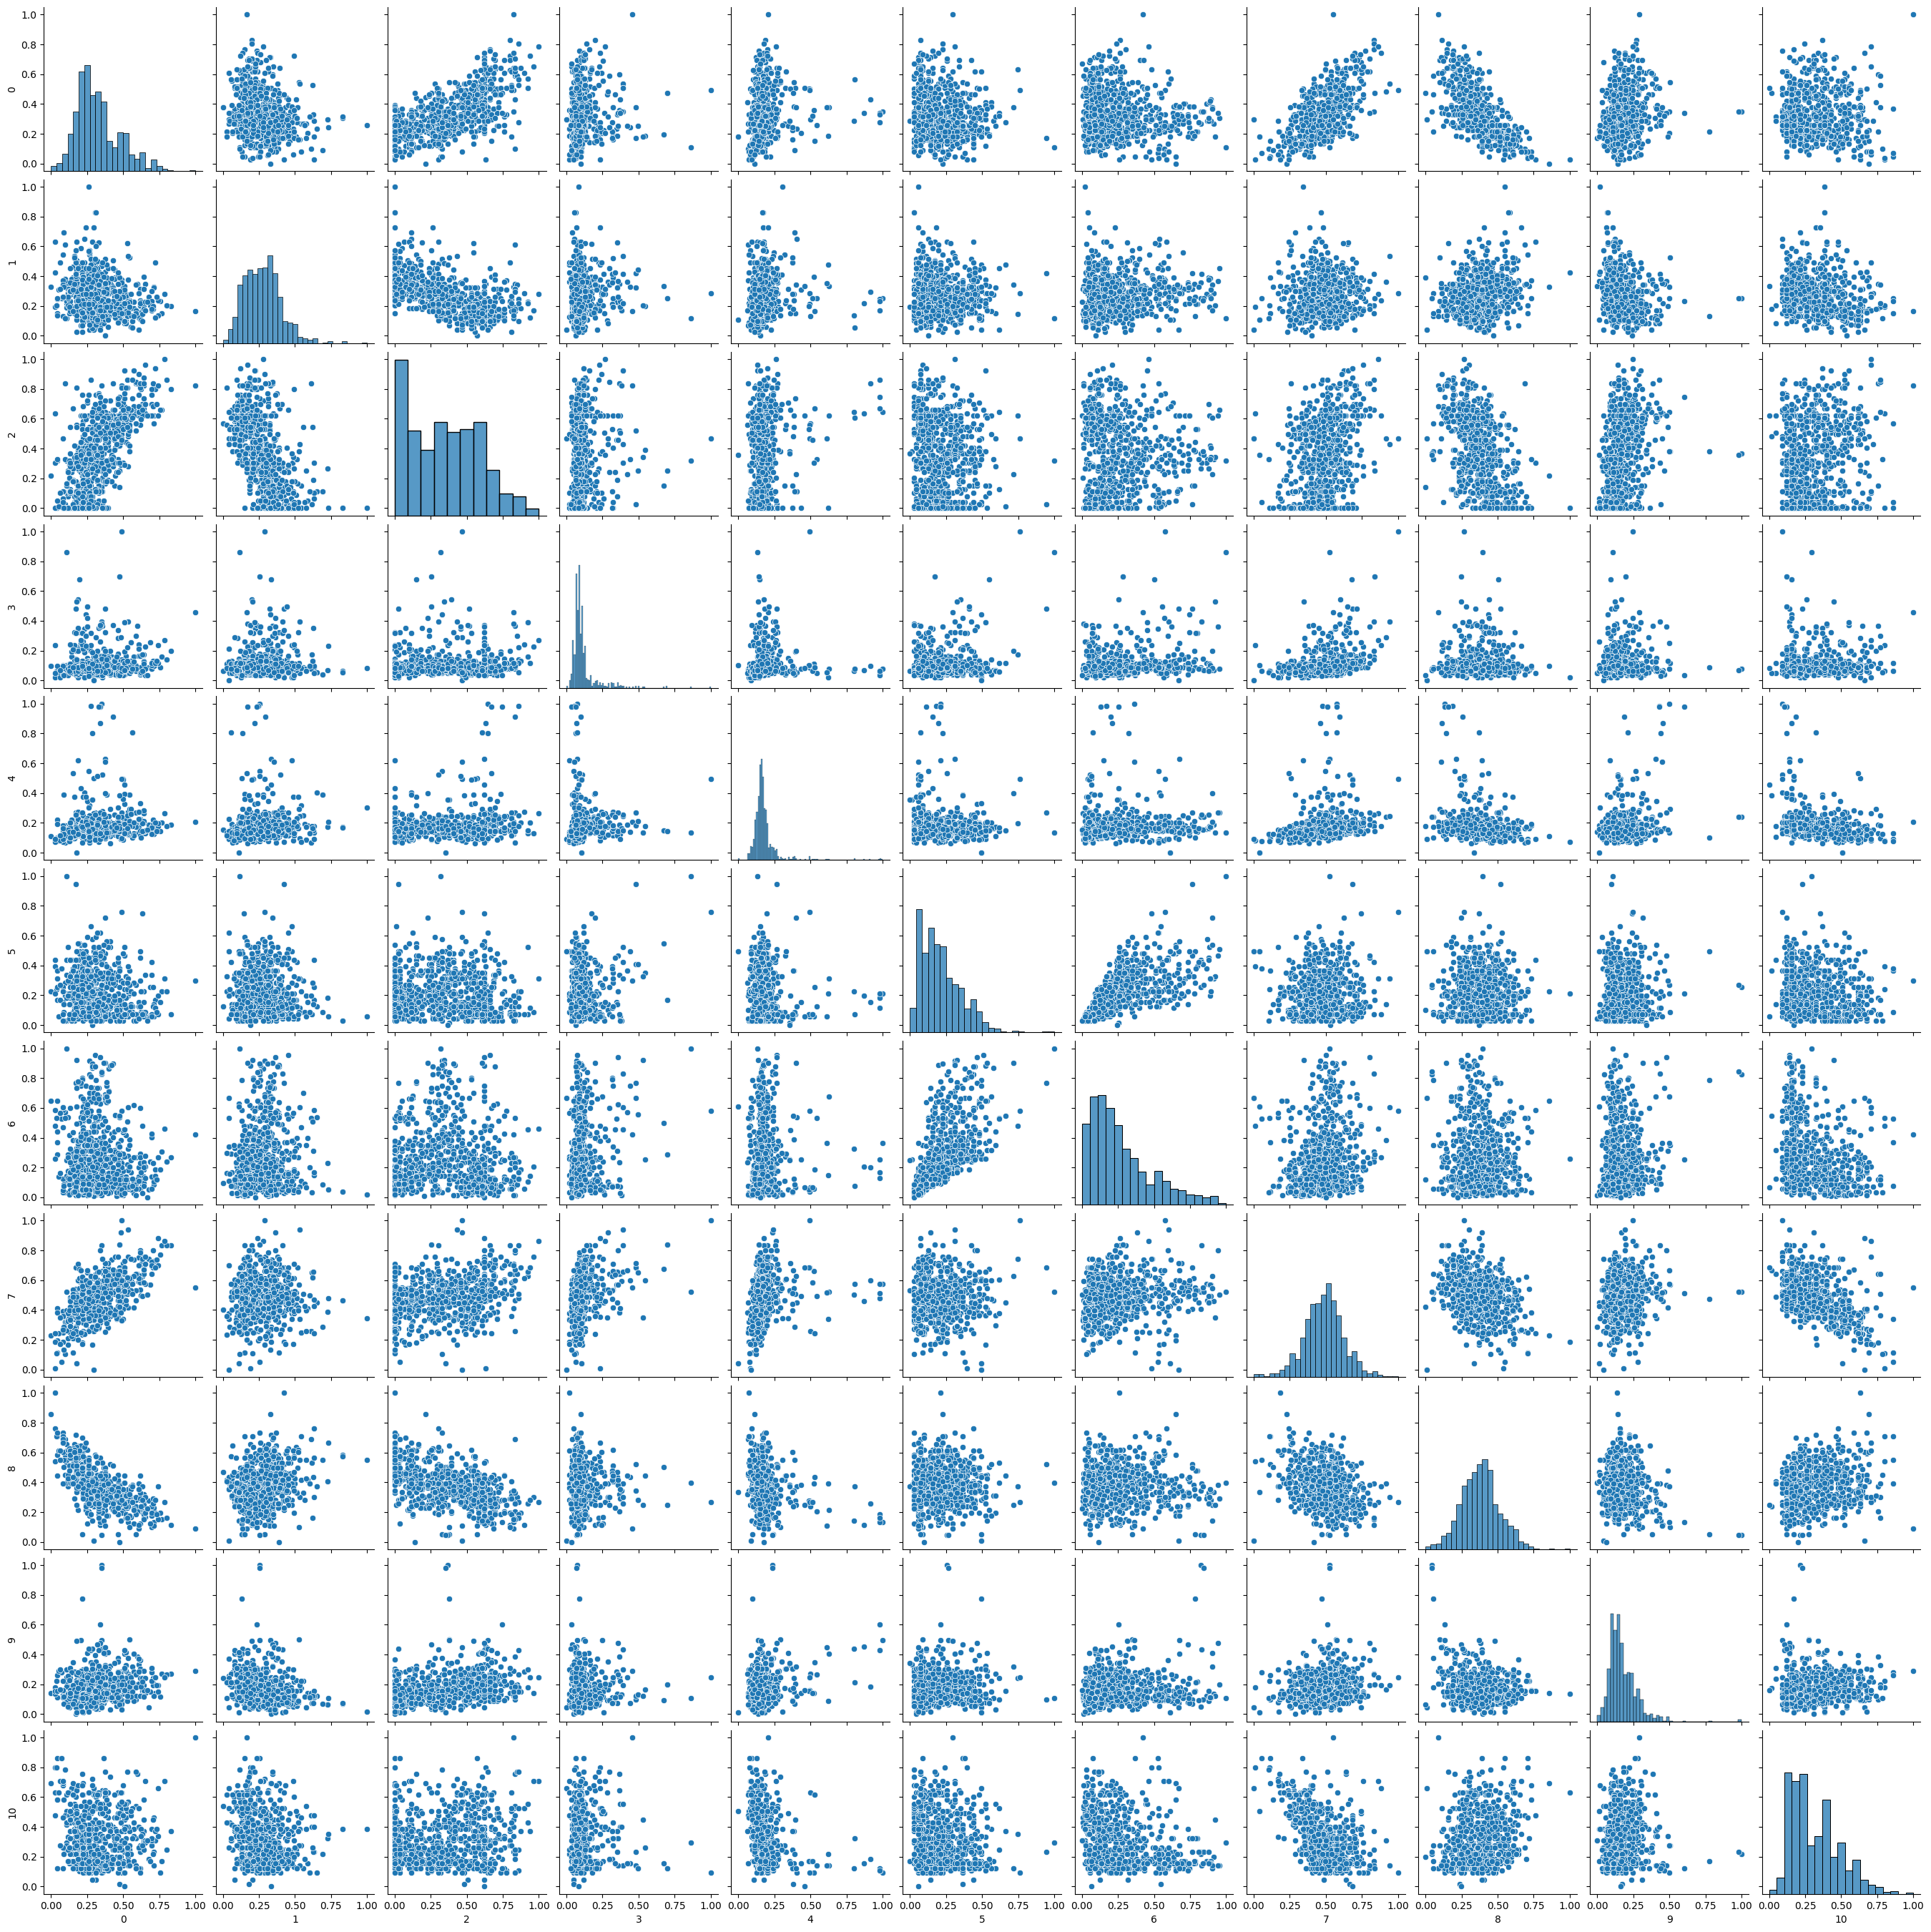

In [34]:
sns.pairplot(X_train)